In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics, ensemble, decomposition
import random
from IPython.display import Image
%matplotlib inline

###Lecture3_Exercises

**Economics dataset analysis**

The folder economics (~/DSE200/DSE200/data/economics/) has a set of small datasets corresponding to different economics topics. We will use Pandas to incorporate these datasets into our workflow, merge them and analyze the economic trends as a function of time.

To achieve this, do the following

1. Read each of the csv files iteratively
2. Merge all of the data into a single dataframe by building a dictionary where the keys are the codes and the values are the Series from each downloaded file
3. Construct the Term and Default premia series using basic math on the series, and mmerge the resulting series using JOIN operation. HINT: term_premium = merged_data[’GS10’] - merged_data[’GS1’] and default_premium = merged_data[’BAA’] - merged_data[’AAA’]
4. Process the data
5. Plot ’GDP_growth’,’IP_growth’ and 'Unemp_rate' a a function of time and draw inferences
6. Use pandas function scatter_matrix to generate scatter plots of ’GDP_growth’,’IP_growth’ and 'Unemp_rate' in a mmatrix form with kernel density plots along the diagonals.

Note: Processing the data is of utmost importance for better readability and understanding of the data. Process the above data by ensuring the following

1. dropping the rows with null values
2. Output data regularly to see if they are following regular format. Use pandas.series.pct_change wherever necessary

**The codes and their corresponding series representation**

                            Series                   Code           Frequency
                            Real GDP                 GDPC1          Quarterly
                            Industrial Production   INDPRO          Quarterly
                            Core CPI               CPILFESL         Monthly
                            Unemployment Rate       UNRATE          Monthly
                            10 Year Yield            GS10           Monthly
                            1 Year Yield             GS1            Monthly
                            Baa Yield                BAA            Monthly
                            Aaa Yield                AAA            Monthly
                            
** Variable Description **

                            Series                        Description
                            Treated                       Dummy indicating whether the candidate received the treatment
                            Age                           Age in years
                            Education (years)             Years of Education
                            Black                         Dummy indicating African-American
                            Hispanic                      Dummy indicating Hispanic
                            Married                       Dummy indicating married
                            Real income Before ($)        Income before program
                        Real income After ($)         Income after program           


In [3]:
try:
    del merged_data
except:
    pass
docs=['AAA','BAA','CPILFESL','GDPC1','GS1','GS10','INDPRO','UNRATE']
for doc in docs:
    data=open(r'/home/sadat/Documents/DSE/ssnazrul/DSE200/data/economics/'+doc+'.csv','r')
    df=pd.read_csv(data)
    df.rename(columns={'VALUE':doc}, inplace=True)
    try:
        merged_data=pd.merge(merged_data,df,how='outer', on="DATE")
    except:
        merged_data=df
    data.close()
merged_data.set_index('DATE', inplace=True)
merged_data.head()

,AAA,BAA,CPILFESL,GDPC1,GS1,GS10,INDPRO,UNRATE
DATE,,,,,,,,
1919-01-01,5.35,7.12,NaN,NaN,NaN,NaN,4.8582,NaN
1919-02-01,5.35,7.20,NaN,NaN,NaN,NaN,4.6435,NaN
1919-03-01,5.39,7.15,NaN,NaN,NaN,NaN,4.5092,NaN
1919-04-01,5.44,7.23,NaN,NaN,NaN,NaN,4.5898,NaN
1919-05-01,5.39,7.09,NaN,NaN,NaN,NaN,4.6166,NaN


In [77]:
term_premium=pd.Series(merged_data['GS10']-merged_data['GS1'], name='TERM PREMIUM')
default_premium=pd.Series(merged_data['AAA']-merged_data['BAA'], name='DEFAULT PREMIUM')

premium=pd.concat([term_premium,default_premium],axis=1).reset_index()

premium.head()

,DATE,TERM PREMIUM,DEFAULT PREMIUM
0,1919-01-01,NaN,-1.77
1,1919-02-01,NaN,-1.85
2,1919-03-01,NaN,-1.76
3,1919-04-01,NaN,-1.79
4,1919-05-01,NaN,-1.70


10 Year Yield and 1 Year Yield data were not collected before 1945 and hence produced NaN for Term Premium calculations for that period.

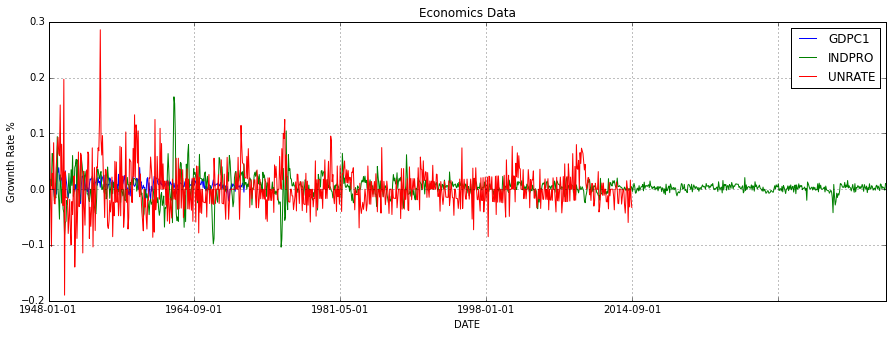

In [78]:
GDP=merged_data['GDPC1'].dropna().pct_change()
IP=merged_data['INDPRO'].dropna().pct_change()
Unemp=merged_data['UNRATE'].dropna().pct_change()

f=plt.figure(figsize=(15,5))
GDP.plot()
IP.plot()
Unemp.plot()
plt.legend(['GDPC1','INDPRO','UNRATE'])
plt.title('Economics Data')
plt.xlabel('DATE')
plt.ylabel(r'Grownth Rate %')
plt.grid()

Analysis of plot:

1. From the line plot, we can see some direct positive correlation between GPD rate and Industrial Production rate. However, more analysis needs to be done to make a more conclusive statment. 
2. There is no clear pattern for unemployment rate.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd24985990>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fbd245c93d0>]], dtype=object)

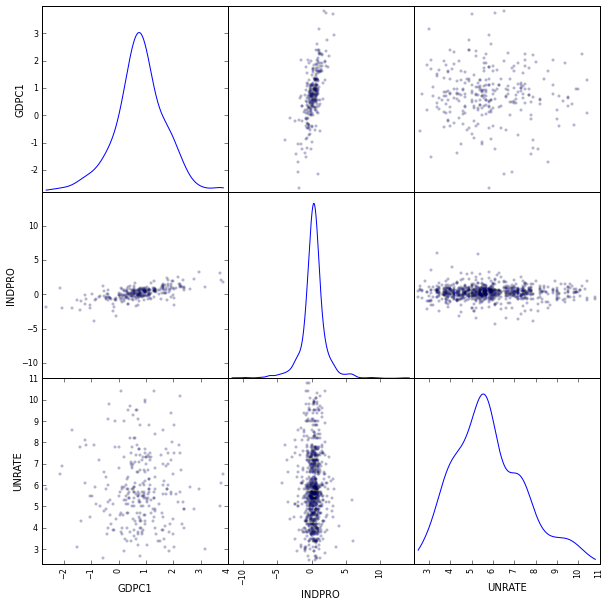

In [48]:
from pandas.tools.plotting import scatter_matrix

Econ=pd.concat([GDP, IP, Unemp],axis=1).reset_index()
scatter_matrix(Econ, alpha=0.2, figsize=(10,10), diagonal='kde')

Analysis of Scatter Matrix:

1. The scatter matrix shows direct positive correlation between GDP and Industrial Production rate with high $R^2$.
2. Unemployment rate has no apparent correlation with Industrial Production rate with high $R^2$.
3. Unemployment rate has no apparent correlation with GDP growth rate with low $R^2$.
4. There seems to be no skew in the GDP or Industrial Production rates. Unemployment rate is skewed to the right.
5. The variance in GDP change is higher than Industrial Production change. 

**Nutrition dataset analysis**

Download the dataset from http://ashleyw.co.uk/files/foods-2011-10-03.json.zip
This data set is a compilation of data provided by the US department of Agriculture. The data set contains data for 6,636 unique foods and 94 unique nutrients (with an average of 56.5 nutrients per food)

Do the following

Use the built in python json module to load the food data into a python list

Your code should look like this

> import json
> db = json.load(open('foods-2011-10-03.json'))

db will be a list of 6636 python dictionaries, each containing nutritional information for a different food item. Each dictionary will have the following keys:

    1.portions
    2.description
    3.tags
    4.nutrients
    5.group
    6.id
    7.manufacture

Now, create a DataFrame of meta_data using the description, group, id, and manufacturer items in each dictionary.

Loop over db and construct a list of DataFrames containing the nutritional information for each record in db. Make sure to add a column to each of these DataFrames that contains the unique food id (id key in the dictionary)

Finally, use the pandas combining techniques to create a nutrients DataFrame. After you have done this drop duplicate entries in this DataFrame. For example, if you had named the objects nuts you would do

nuts = nuts.drop_duplicates()

Use the rename method to make sure that the description and group columns are un-ambiguous for both the meta_data DataFrame and the nutrients DataFrame (These column names are duplicated because every food has a description and group and each nutrient also has those identifiers). 

Finally, use the data combining routines to come up with a foods DataFrame containing all the meta_data and nutritional information. Make sure to do an outer style merge on the correct columns.

Using the foods DataFrame you have been building, compute the following things:

1. The food item with the highest content of each nutrient.
2. A function that accepts a nutrient name and a quantile value and generates a horizontal bar plot of the amount of that nutrient in each food group. Provide a plot title. HINT: You will need to use the quantile and sort (or order ) methods in order for this to work. 

####Creating Meta_Data

In [4]:
#!wget https://github.com/pydata/pydata-book/blob/master/ch07/foods-2011-10-03.json?raw=true

In [2]:
import json
db = json.load(open('foods-2011-10-03.json'))

In [14]:
try:
    del meta_data
except:
    pass
for index, dictionary in enumerate(db):
    
    #Print progress
    print str(index)+' of '+str(len(db)),'\r',
    
    #Convert dictionary to new DataFrame for meta_data
    df=pd.DataFrame({'#':[0]})
    df['description']=dictionary['description']
    df['group']=dictionary['group']
    df['id']=dictionary['id']
    df['manufacturer']=dictionary['manufacturer']
    del df['#']
    try:
        #If meta_data exists, merge with df
        meta_data=pd.merge(meta_data,df, how='outer')
    except:
        #If meta_data doesnt exist, df is the new meta_data
        meta_data=df
        
#Setting id as index
meta_data.set_index('id', inplace=True)

#Removing duplicates
meta_data.drop_duplicates()

print 'meta_data ready!'

meta_data ready!


In [16]:
meta_data.index.name='id'
print '\nFinal processed meta_data Data Frame:\n'
meta_data.head()


Final processed meta_data Data Frame:



,description,group,manufacturer
id,,,
1008,"Cheese, caraway",Dairy and Egg Products,
1009,"Cheese, cheddar",Dairy and Egg Products,
1018,"Cheese, edam",Dairy and Egg Products,
1019,"Cheese, feta",Dairy and Egg Products,
1028,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,


####Computing max nutrient contents

In [3]:
#Analyzing a sample dictionary in the nutrient column

#Creating the food Data Frame from the original JSON file
food=pd.DataFrame(db)
food.set_index('id', inplace=True)
for i in food.index.values:
    for nutri in food['nutrients'][i]:
        #Add the food id to each nutrient dictionary
        nutri['id']=i

#Print sample dictionary        
food['nutrients'][1008][0]


{u'description': u'Protein',
 u'group': u'Composition',
 'id': 1008,
 u'units': u'g',
 u'value': 25.18}

In [5]:
dict_list=[]
for index, i in enumerate(food.index.values):
    print str(index)+' of '+str(len(food.index.values)),'\r',
    for nutri in food['nutrients'][i]:
        dict_list.append(nutri)
print 'List of Dictionaries ready!\n'
print 'First 10 elements of list:\n'
print dict_list[0:10]

List of Dictionaries ready!

First 10 elements of list:

[{u'units': u'g', u'group': u'Composition', u'description': u'Protein', u'value': 25.18, 'id': 1008}, {u'units': u'g', u'group': u'Composition', u'description': u'Total lipid (fat)', u'value': 29.2, 'id': 1008}, {u'units': u'g', u'group': u'Composition', u'description': u'Carbohydrate, by difference', u'value': 3.06, 'id': 1008}, {u'units': u'g', u'group': u'Other', u'description': u'Ash', u'value': 3.28, 'id': 1008}, {u'units': u'kcal', u'group': u'Energy', u'description': u'Energy', u'value': 376.0, 'id': 1008}, {u'units': u'g', u'group': u'Composition', u'description': u'Water', u'value': 39.28, 'id': 1008}, {u'units': u'kJ', u'group': u'Energy', u'description': u'Energy', u'value': 1573.0, 'id': 1008}, {u'units': u'g', u'group': u'Composition', u'description': u'Fiber, total dietary', u'value': 0.0, 'id': 1008}, {u'units': u'mg', u'group': u'Elements', u'description': u'Calcium, Ca', u'value': 673.0, 'id': 1008}, {u'units': u

In [17]:
num=[]
description=[]
group=[]
i=[]
units=[]
value=[]
for index, dictionary in enumerate(dict_list):
    print str(index)+' of '+str(len(dict_list)),'\r',
    description.append(dictionary['description'])
    group.append(dictionary['group'])
    i.append(str(dictionary['id']))  #Convert to str to avoid math operations on id
    units.append(dictionary['units'])
    value.append(dictionary['value'])
print 'List of attributes ready!\n'
print 'First 10 elements of sample attribute, id:\n'
print i[0:10]

List of attributes ready!

First 10 elements of sample attribute, id:

['1008', '1008', '1008', '1008', '1008', '1008', '1008', '1008', '1008', '1008']


In [9]:
nutrients={}
nutrients['description']=description
nutrients['group']=group
nutrients['id']=i
nutrients['units']=units
nutrients['value']=value

nutrients=pd.DataFrame(nutrients)
print '\nData Frame of nutrients data:\n'
nutrients.head()


Data Frame of nutrients data:



,description,group,id,units,value
0,Protein,Composition,1008,g,25.18
1,Total lipid (fat),Composition,1008,g,29.20
2,"Carbohydrate, by difference",Composition,1008,g,3.06
3,Ash,Other,1008,g,3.28
4,Energy,Energy,1008,kcal,376.00


In [27]:
max_nut=nutrients.groupby(['description']).max()
print '\nFinal Data Frame with max value of each nutrient:\n'
max_nut.head()


Final Data Frame with max value of each nutrient:



,group,id,units,value
description,,,,
Adjusted Protein,Composition,19078,g,12.900
Alanine,Amino Acids,9445,g,8.009
"Alcohol, ethyl",Other,9444,g,42.500
Arginine,Amino Acids,9445,g,7.436
Ash,Other,9451,g,72.500


####Function for visualizing the quantile of each group for a given nutrient

In [74]:
def nutri_box(nutrient, quantile):
    df=nutrients[nutrients['description']==str(nutrient)]
    #return df
    df=df.groupby(['group']).quantile(q=quantile)
    df.plot(kind='barh')
    plt.title(nutrient+' (quantile = '+str(quantile)+')')


3 Sample plots with Quantile = 0.3


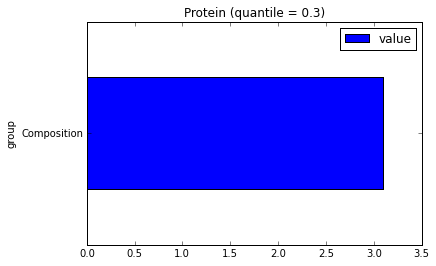

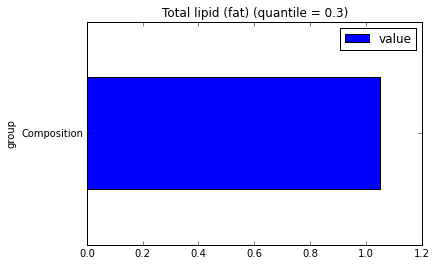

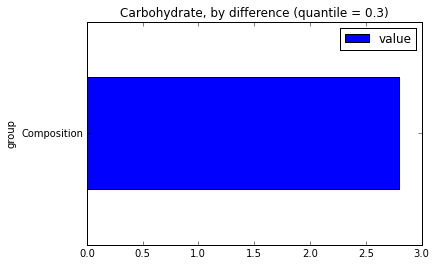

In [75]:
print '\n3 Sample plots with Quantile = 0.3'
unique=nutrients['description'].unique()
for i in unique[0:3]:
    nutri_box(i,0.3)

**Classifying Digits**
SKLearn has many intereting datasets pre-loaded in it, one of which is load_digits (sklearn.datasets.load_digits - http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). Load_digits is a dataset of digits, with each datapoint being a 8x8 image of a digit. 

You can load this dataset as follows

In [19]:
from sklearn.datasets import load_digits
digits = load_digits()

And the images can be visualized as follows

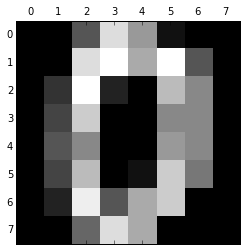

In [20]:
import pylab as pl 
pl.gray() 
pl.matshow(digits.images[0]) 
pl.show() 

1. Visualize the first 15 digits to get a better understanding of the data
2. With x as data and y as target, classify the above datasets into individual targets using a decision tree
3. Perform this classification task with sklearn.svm.SVC. How does the choice of kernel affect the results?
4. Perform this classification task with sklearn.ensemble.RandomForestClassifier. Write in the markdown below the impact each of the parammeter had on the result



        1. max_depth: 
        2. max_features:
        3. n_estimators:



Try a few sets of parameters for each model and check the F1 score (sklearn.metrics.f1_score) on your results. Output the best F1 score that you achieve. 



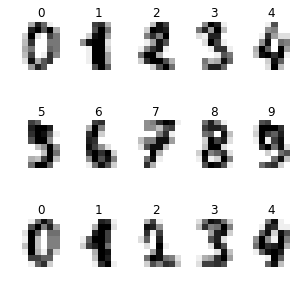

In [21]:
#1. Visualize the first 15 digits to get a better understanding of the data

images_and_labels = list(zip(digits.images, digits.target))
plt.figure(figsize=(5,5))
for index, (image, label) in enumerate(images_and_labels[:15]):
    plt.subplot(3, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('%i' % label)

We can see different images of the digits 0-9.

In [22]:
#2 With x as data and y as target, classify the above datasets into individual targets using a decision tree

#Define variables
n_samples = len(digits.images)
x = digits.images.reshape((n_samples, -1))
y = digits.target

#Create random indices
sample_index=random.sample(range(len(x)),len(x)/5)
valid_index=[i for i in range(len(x)) if i not in sample_index]

#Sample and validation images
sample_images=[x[i] for i in sample_index]
valid_images=[x[i] for i in valid_index]

#Sample and validation targets
sample_target=[y[i] for i in sample_index]
valid_target=[y[i] for i in valid_index]

#Using the Random Tree Classifier
classifier = ensemble.RandomForestClassifier()

#Fit model with sample data
classifier.fit(sample_images, sample_target)

#Attempt to predict validation data
score=classifier.score(valid_images, valid_target)
print 'Random Tree Classifier:\n'
print 'Score\t'+str(score)

Random Tree Classifier:

Score	0.877607788595


In [23]:
#3 Perform this classification task with sklearn.svm.SVC. How does the choice of kernel affect the results?

print 'C-Support Vector Classification:\n'

#Creating a list of kernels
kernels=['linear','poly','rbf','sigmoid']

#Loop through each kernel
for k in kernels:
    
    #Create random indices
    sample_index=random.sample(range(len(x)),len(x)/5)
    valid_index=[i for i in range(len(x)) if i not in sample_index]

    #Sample and validation images
    sample_images=[x[i] for i in sample_index]
    valid_images=[x[i] for i in valid_index]

    #Sample and validation targets
    sample_target=[y[i] for i in sample_index]
    valid_target=[y[i] for i in valid_index]
    
    #Use SVC classifier with selected kernel
    classifier = svm.SVC(gamma=0.001, kernel=k)
    
    #Fit model with sample data
    classifier.fit(sample_images, sample_target)

    #Attempt to predict validation data
    score=classifier.score(valid_images, valid_target)
    
    print k+'\t\t'+str(score)

C-Support Vector Classification:

linear		0.958970792768
poly		0.970792767733
rbf		0.970097357441
sigmoid		0.239916550765


Linear, Polynomial and RBF kernels produce the best results. The difference between them is negligible as we are dealing with randomized datasets.

Sigmoid produces a significanly low score and hence is not appropriate for this model.

In [24]:
#Perform this classification task with sklearn.ensemble.RandomForestClassifier. 
#Write in the markdown below the impact each of the parammeter had on the result
 #   1. max_depth: 
 #   2. max_features:
 #   3. n_estimators:
#Try a few sets of parameters for each model and check the F1 score 
#(sklearn.metrics.f1_score) on your results. Output the best F1 score that you achieve. 

def max_depth():
    max_depth=[]
    for n in range(1,50):
        classifier = ensemble.RandomForestClassifier(max_depth=n)
        classifier.fit(sample_images, sample_target)
        max_depth.append(classifier.score(valid_images, valid_target))
    return max_depth
        
def max_features():
    max_features=[]
    for n in range(1,50):
        classifier = ensemble.RandomForestClassifier(max_features=n)
        classifier.fit(sample_images, sample_target)
        max_features.append(classifier.score(valid_images, valid_target))
    return max_features
        
def n_estimators():
    n_estimators=[]
    for n in range(1,50):
        classifier = ensemble.RandomForestClassifier(n_estimators=n)
        classifier.fit(sample_images, sample_target)
        n_estimators.append(classifier.score(valid_images, valid_target))
    return n_estimators

#Define variables
n_samples = len(digits.images)
x = digits.images.reshape((n_samples, -1))
y = digits.target

#Create random indices
sample_index=random.sample(range(len(x)),len(x)/5)
valid_index=[i for i in range(len(x)) if i not in sample_index]

#Sample and validation images
sample_images=[x[i] for i in sample_index]
valid_images=[x[i] for i in valid_index]

#Sample and validation targets
sample_target=[y[i] for i in sample_index]
valid_target=[y[i] for i in valid_index]

#Using the Random Tree Classifier
classifier = ensemble.RandomForestClassifier()

#Fit model with sample data
classifier.fit(sample_images, sample_target)

#Attempt to predict validation data
max_depth=max_depth()
max_features=max_features()
n_estimators=n_estimators()

print 'Ready to plot'

Ready to plot


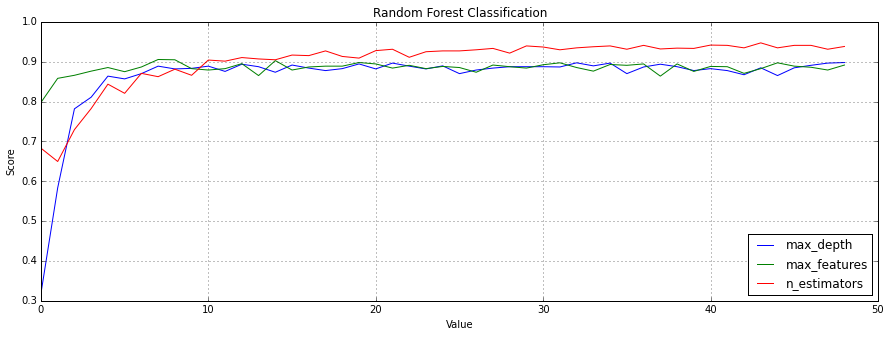

In [26]:
#Plot
f=plt.figure(figsize=(15,5))
ax=f.add_subplot(111)
ax.plot(max_depth)
ax.plot(max_features)
ax.plot(n_estimators)
ax.set_xlabel('Value')
ax.set_ylabel('Score')
ax.set_title('Random Forest Classification')
ax.legend(['max_depth','max_features','n_estimators'], loc=0)
plt.grid()

The scores are around 0.9 when all 3 parameters are equal to 10.

###Dimensionality Reduction - PCA

Principal Component Analysis is a very powerful unsupervised method for dimensionality reduction in data.
Apply dimensionality reduction technique PCA (Principle Component Analysis) on the prev dataset - load_digits(). Use the sklearn inbuilt tool sklearn.decomposition.PCA
Print the shape of the matrix before and after the application of PCA on the dataset. Using variance, analyze the ammount of information thrown away and plot the variance(cumulative) against the number of components
Try other dimensionality reduction techniques - sklearn.decomposition.RandomizedPCA, sklearn.decomposition.FastICA as well (this extended analysis need not be submitted as part of homework)

In [32]:
#Define variables
n_samples = len(digits.images)
x = digits.images.reshape((n_samples, -1))
print '\nOriginal Matrix Size:\t'+str(np.shape(x))

#PCA
K=5
pca=decomposition.PCA(n_components=K)
pca.fit(x)
T=pca.transform(x)
print 'PCA Size:\t\t'+str(np.shape(T))
print '\nHence, PCA reduced the number of columns'


Original Matrix Size:	(1797, 64)
PCA Size:		(1797, 5)

Hence, PCA reduced the number of columns



We can have 85% accuracy with K=20.


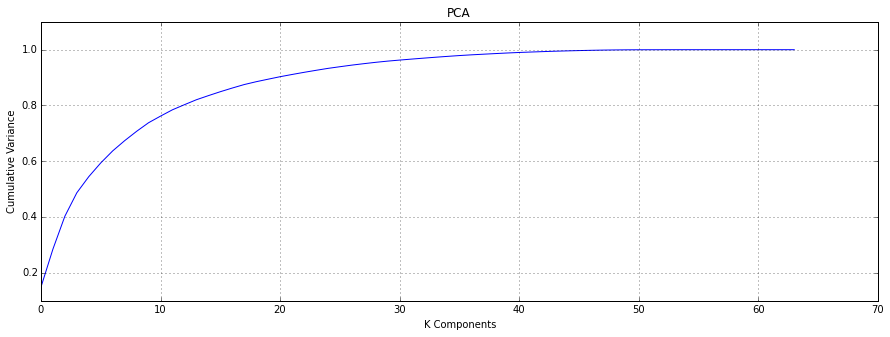

In [37]:
pca=decomposition.PCA()
pca.fit(x)
T=pca.transform(x)
np.shape(T)
cumulative_explained = np.cumsum(pca.explained_variance_ratio_) 
plt.figure(figsize=(15,5))
plt.plot(cumulative_explained)
plt.xlabel('K Components')
plt.ylabel('Cumulative Variance')
plt.title('PCA')
plt.grid()
print '\nWe can have 85% accuracy with K=20.'


We can have 85% accuracy with K=20.


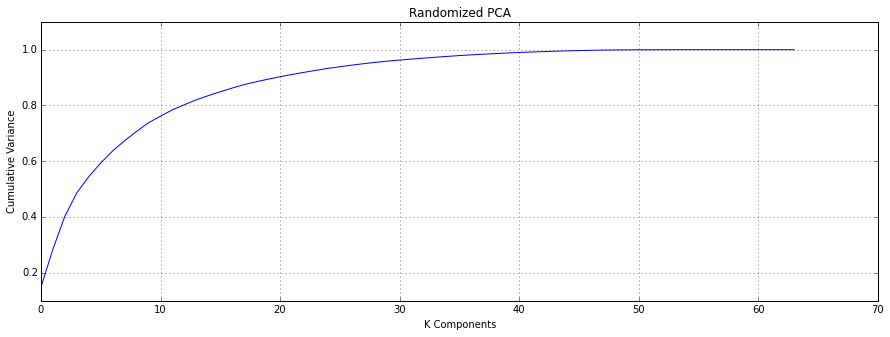

In [38]:
pca=decomposition.RandomizedPCA()
pca.fit(x)
T=pca.transform(x)
np.shape(T)
cumulative_explained = np.cumsum(pca.explained_variance_ratio_) 
plt.figure(figsize=(15,5))
plt.plot(cumulative_explained)
plt.xlabel('K Components')
plt.ylabel('Cumulative Variance')
plt.title('Randomized PCA')
plt.grid()
print '\nWe can have 85% accuracy with K=20.'

There is no apparent change in K value using Ramdomized PCA instead of PCA.

###Weather Analysis

<span style="color:red"> The correlations between different $V_i$ components should be zero, which it isn't.
Is this due to numerical roundoff errors? Are the correlations statistically significant for this sample size? </span>

For the sample size, the error value is high. This is because the values are greater than 0.05.

<span style="color:red">Waiting for somebody to write a script that will do that automatically from python i.e write a script in python return the google maps url when passed with the latitude and longitudinal values of the place</span>


In [ ]:
def Google_Map(latitude,longitude):
    main='https://www.google.com/maps/@'
    url=main+str(latitude)+','+str(longitude)+',17z'
    return url

<span style="color:red">Can you create a map where the denity of points is represented as a density map (topographical map)?</span>

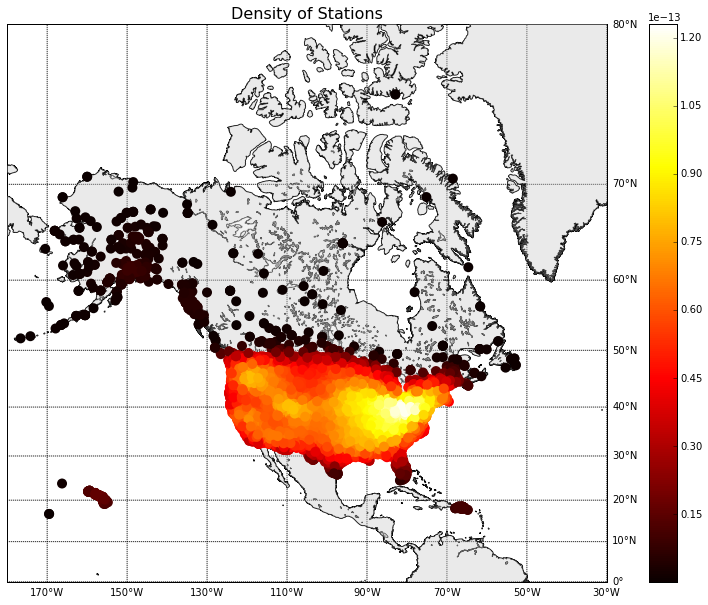

In [5]:
Image(filename='index.png') 

<span style="color:red">Can you create a map that would represent, using color, the values of a chosen column (Mean, Std, V0,V1 etc.)? What conclusions can you draw from this map?</span>

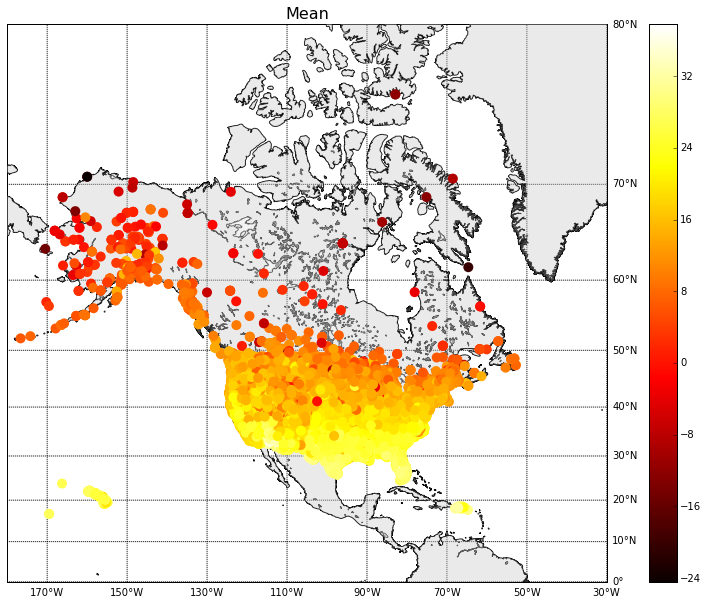

In [6]:
Image(filename='index2.png') 

<span style="color:red"> Check how the approximations change/improve as you increase the number of coefficients</span>

Changing K value in the function has no affect on the variance.

<span style="color:red">Can you reduce the reconstruction error (using a fixed number of eigenvectors) by splitting the stations according to region (for example country, state, latitudal range). Note that having a regions with very few readings defeats the purpose.

Separating data by location increased the error because:
1. there are differnent temperature readings accross the state
2. the sample size is smaller